# Data preparation
## Modality 5: Nutritional Knowledge
This stage has the purpose of preparing the dataset for model training, it consists on:
- Exploratory Data Analysis
- Feature engineering
- Export CSV for unimodal supervised and unsupervised approaches
- Data preparation
    - Merge based on sample dataset key
    - Group setup for LOGO CV
    - Feature scaling

## Setup

### Libraries

In [2]:
import os
import numpy as np
import pandas as pd  
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics, tree, svm, preprocessing
from sklearn.datasets import make_blobs, make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
import seaborn as sns; sns.set()
from seaborn import heatmap

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Paths

In [3]:
input_path = '../../1_feature_extraction/output/'

input_path_kinship = '../../0_source_csv/kinship_matrix/'
input_path_residents = '../../0_source_csv/ensanut/'

output_path = '../output/'

# Global configuration path
glob_conf_path = '../../config/global_config_paper.py'

### Load local variables

In [4]:
exec(open(glob_conf_path).read())

## Exploratory Data Analysis

In [5]:
# Import dataset
m5_dataset = pd.read_csv(os.path.join(input_path, "m5_feature_extraction.csv"), skipinitialspace=True)

# See shape
m5_dataset.shape

(10303, 44)

In [6]:
m5_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10303 entries, 0 to 10302
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   house_ID              10303 non-null  object 
 1   household_ID          10303 non-null  object 
 2   person_ID             10303 non-null  object 
 3   region                10303 non-null  object 
 4   strata                10303 non-null  object 
 5   locality_type         10303 non-null  object 
 6   locality_size         10303 non-null  object 
 7   age_months            10303 non-null  int64  
 8   age_years             10303 non-null  int64  
 9   sex                   10303 non-null  object 
 10  BMI_SD                10303 non-null  float64
 11  label_cat             10303 non-null  object 
 12  label                 10303 non-null  int64  
 13  age_nut_know_adult    10155 non-null  float64
 14  sex_nut_know_adult    10155 non-null  float64
 15  nut_cont_knowledge 

In [7]:
m5_dataset.describe()

,age_months,age_years,BMI_SD,label,age_nut_know_adult,sex_nut_know_adult,nut_cont_knowledge,nut_inf_decision,read_dng,read_nf_table,...,calories,product_A,product_B,product_C,energy_importance,sodium_importance,sugars_importance,fats_importance,sat_fats_importance,kinship_random_adult
count,10303.000000,10303.000000,10303.000000,10303.000000,10155.000000,10155.000000,9261.000000,7109.000000,4012.000000,4012.000000,...,9261.000000,4646.000000,4646.000000,4646.000000,7423.000000,7423.000000,7423.000000,7423.000000,7423.000000,10155.000000
mean,137.227895,10.979229,0.886200,0.422984,40.090793,1.575677,1.677573,1.443522,0.527667,0.624875,...,5.427060,4.315325,4.503229,4.610202,3.140644,3.156002,2.345952,3.644349,2.713054,1.895815
std,47.983326,4.001450,1.122003,0.494057,12.659992,0.494264,1.944345,0.556662,0.499296,0.484215,...,2.306437,3.572381,3.356835,3.245435,1.677002,1.190513,1.215502,1.180268,1.389843,1.370062
min,60.000000,5.000000,-0.997984,0.000000,20.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,96.000000,8.000000,-0.010360,0.000000,31.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
50%,133.000000,11.000000,0.754806,0.000000,38.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,2.000000
75%,178.000000,14.000000,1.680409,1.000000,46.000000,2.000000,1.000000,2.000000,1.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,5.000000,4.000000,3.000000,5.000000,4.000000,2.000000
max,228.000000,19.000000,4.992296,1.000000,110.000000,2.000000,9.000000,9.000000,1.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,5.000000,5.000000,5.000000,5.000000,5.000000,9.000000


In [8]:
# Percentages of null values
m5_dataset.isnull().mean()*100

house_ID                 0.000000
household_ID             0.000000
person_ID                0.000000
region                   0.000000
strata                   0.000000
locality_type            0.000000
locality_size            0.000000
age_months               0.000000
age_years                0.000000
sex                      0.000000
BMI_SD                   0.000000
label_cat                0.000000
label                    0.000000
age_nut_know_adult       1.436475
sex_nut_know_adult       1.436475
nut_cont_knowledge      10.113559
nut_inf_decision        31.000679
read_dng                61.059885
read_nf_table           61.059885
read_ing_list           61.059885
read_none               61.059885
read_not_know           61.059885
buy_choice              10.113559
compare_choice          10.113559
time_choice             10.113559
use_dng                 10.113559
use_nut_seal            10.113559
use_legends             10.113559
use_nut_inf             10.113559
use_ing_list  

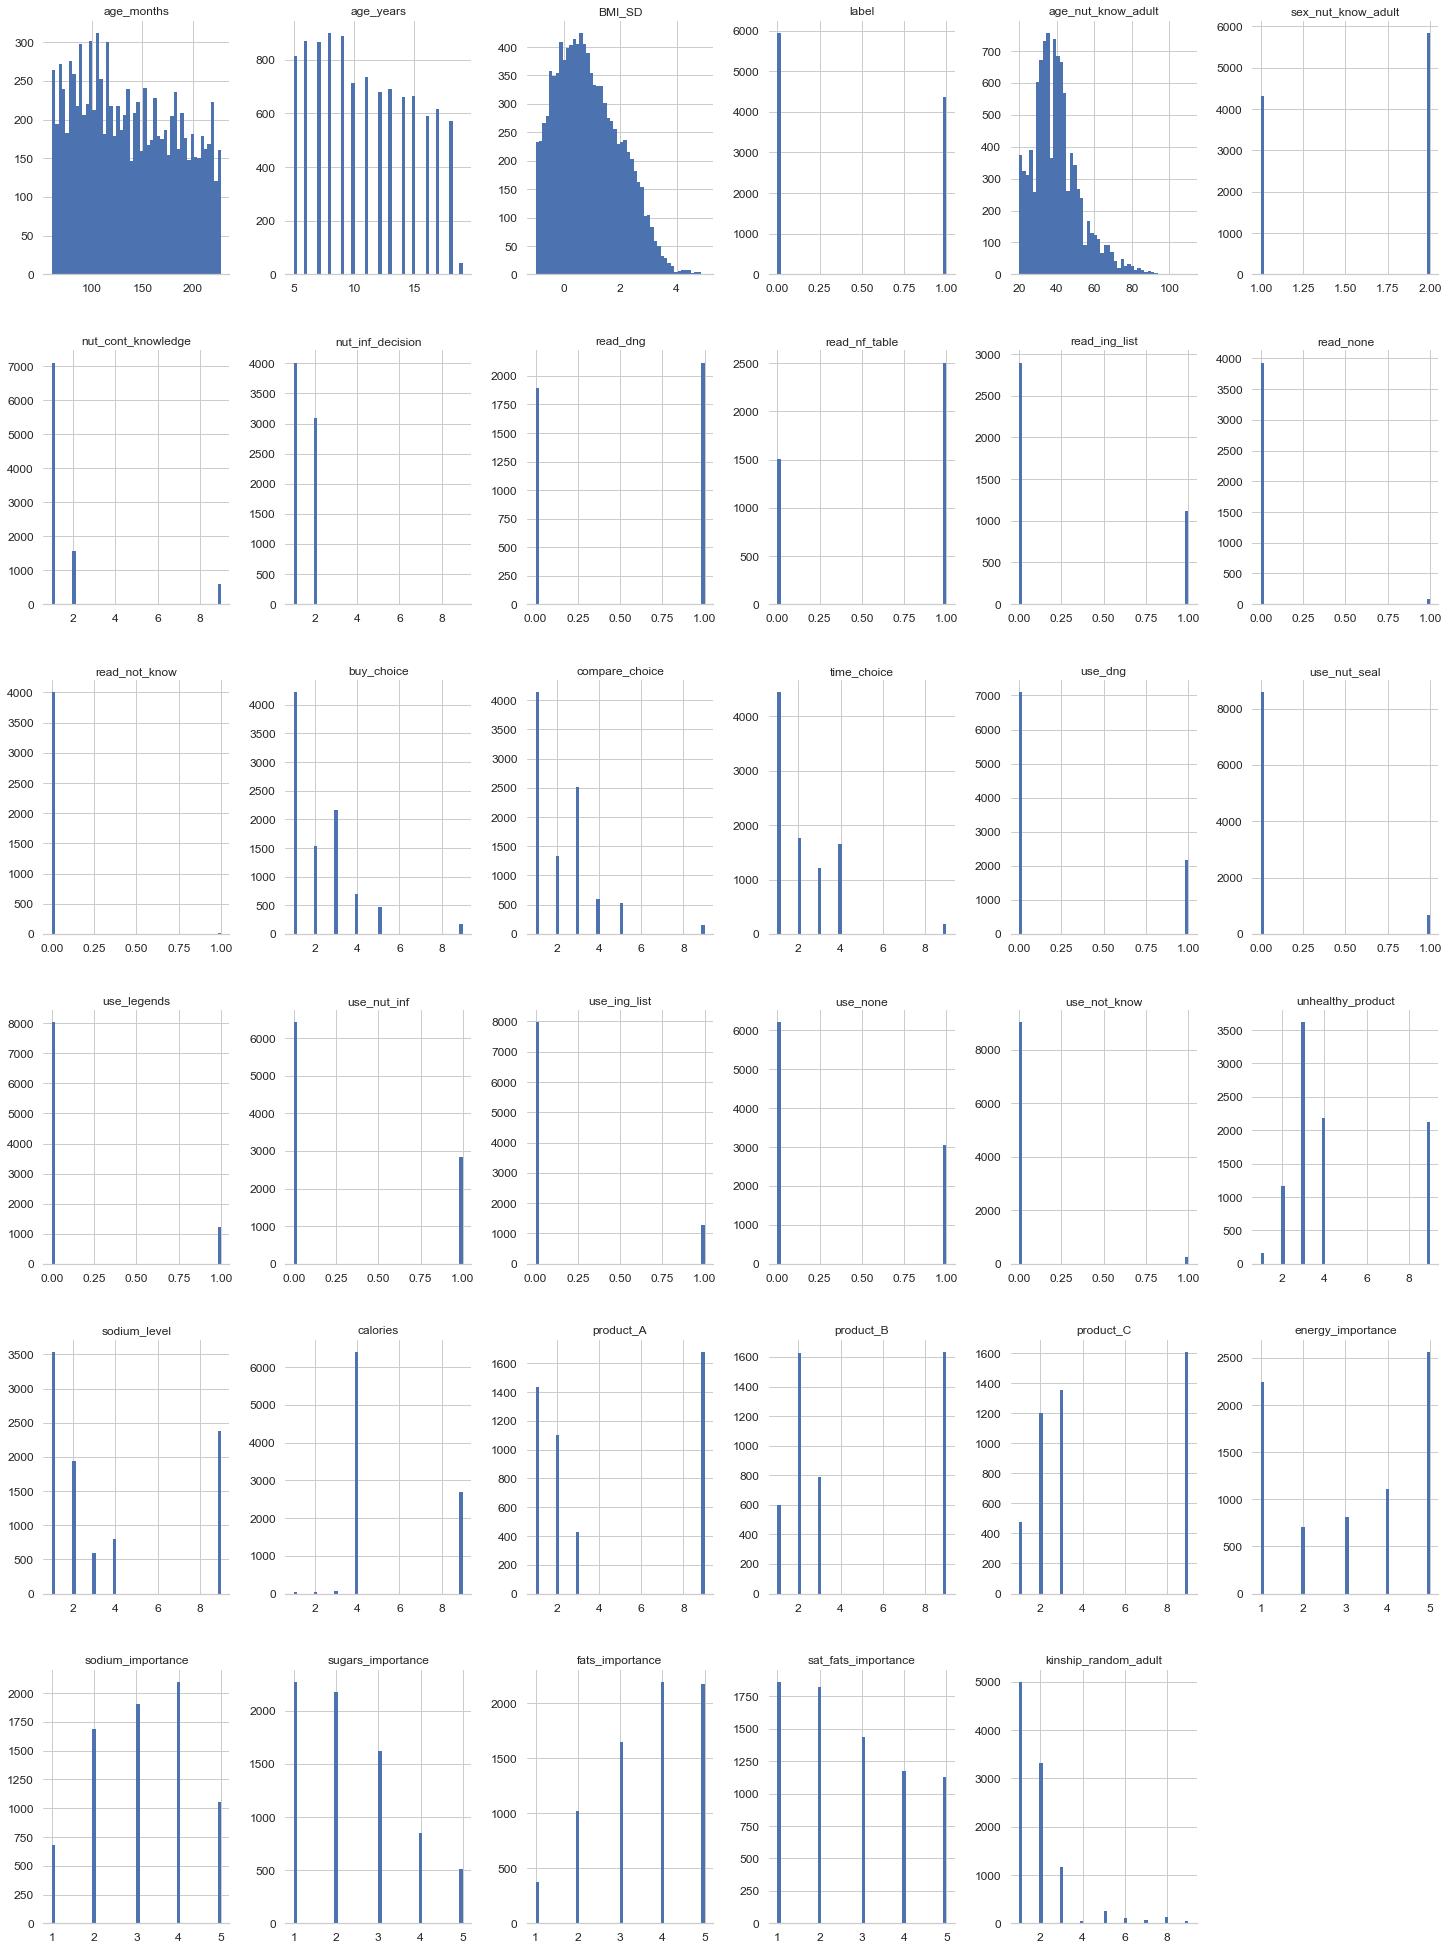

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
m5_dataset.hist(bins=50,figsize=(25,35))
plt.show()

## Feature Engineering
Some transformations are convenient, such as:
- Identify real NaN values and real 0s
- Compute the relationship of the random adult to the observation
- Transform age of random adult into age ranges
- Create dummy variables of categorical features

### Identify real NaN values and real 0s

Lets explore the cases were there are the most NaN values.

In [10]:
m5_dataset.loc[m5_dataset["read_dng"].isnull()]

,house_ID,household_ID,person_ID,region,strata,locality_type,locality_size,age_months,age_years,sex,...,calories,product_A,product_B,product_C,energy_importance,sodium_importance,sugars_importance,fats_importance,sat_fats_importance,kinship_random_adult
2,4_1,4_1_1,4_1_1_4,Centre,2nd_strata,urban,">100,000",162,13,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
4,4_5,4_5_1,4_5_1_5,Centre,2nd_strata,urban,">100,000",169,14,male,...,9.0,9.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN,1.0
5,4_5,4_5_1,4_5_1_6,Centre,2nd_strata,urban,">100,000",114,9,female,...,9.0,9.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN,1.0
6,6_4,6_4_1,6_4_1_3,Centre,2nd_strata,urban,">100,000",78,6,female,...,4.0,NaN,NaN,NaN,5.0,3.0,2.0,1.0,4.0,1.0
7,8_1,8_1_1,8_1_1_3,Centre,3rd_strata,urban,">100,000",185,15,female,...,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10295,3938_6,3938_6_1,3938_6_1_4,Centre,2nd_strata,rural,"<2,500",73,6,female,...,9.0,9.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN,1.0
10298,3938_17,3938_17_1,3938_17_1_3,Centre,2nd_strata,rural,"<2,500",130,10,male,...,4.0,9.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN,3.0
10299,3938_17,3938_17_1,3938_17_1_4,Centre,2nd_strata,rural,"<2,500",119,9,female,...,4.0,9.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN,3.0
10300,3938_19,3938_19_1,3938_19_1_3,Centre,2nd_strata,rural,"<2,500",170,14,male,...,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


A lot of rows that have NaN value in the first question seem to have all NaN values. This may be because the first question was: "Do you know if the packaged foods and bottled drinks have information about their nutritional content?", therefore they will be dropped.

In [11]:
m5_dataset = m5_dataset.dropna(subset=["nut_cont_knowledge"])
m5_dataset.loc[m5_dataset["read_dng"].isnull()]

,house_ID,household_ID,person_ID,region,strata,locality_type,locality_size,age_months,age_years,sex,...,calories,product_A,product_B,product_C,energy_importance,sodium_importance,sugars_importance,fats_importance,sat_fats_importance,kinship_random_adult
4,4_5,4_5_1,4_5_1_5,Centre,2nd_strata,urban,">100,000",169,14,male,...,9.0,9.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN,1.0
5,4_5,4_5_1,4_5_1_6,Centre,2nd_strata,urban,">100,000",114,9,female,...,9.0,9.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN,1.0
6,6_4,6_4_1,6_4_1_3,Centre,2nd_strata,urban,">100,000",78,6,female,...,4.0,NaN,NaN,NaN,5.0,3.0,2.0,1.0,4.0,1.0
7,8_1,8_1_1,8_1_1_3,Centre,3rd_strata,urban,">100,000",185,15,female,...,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
8,8_1,8_1_1,8_1_1_5,Centre,3rd_strata,urban,">100,000",113,9,male,...,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10295,3938_6,3938_6_1,3938_6_1_4,Centre,2nd_strata,rural,"<2,500",73,6,female,...,9.0,9.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN,1.0
10298,3938_17,3938_17_1,3938_17_1_3,Centre,2nd_strata,rural,"<2,500",130,10,male,...,4.0,9.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN,3.0
10299,3938_17,3938_17_1,3938_17_1_4,Centre,2nd_strata,rural,"<2,500",119,9,female,...,4.0,9.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN,3.0
10300,3938_19,3938_19_1,3938_19_1_3,Centre,2nd_strata,rural,"<2,500",170,14,male,...,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [12]:
m5_dataset.loc[m5_dataset["nut_cont_knowledge"] == 9.0]

,house_ID,household_ID,person_ID,region,strata,locality_type,locality_size,age_months,age_years,sex,...,calories,product_A,product_B,product_C,energy_importance,sodium_importance,sugars_importance,fats_importance,sat_fats_importance,kinship_random_adult
4,4_5,4_5_1,4_5_1_5,Centre,2nd_strata,urban,">100,000",169,14,male,...,9.0,9.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN,1.0
5,4_5,4_5_1,4_5_1_6,Centre,2nd_strata,urban,">100,000",114,9,female,...,9.0,9.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN,1.0
44,42_2,42_2_1,42_2_1_4,Centre,3rd_strata,urban,">100,000",155,12,female,...,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
106,94_2,94_2_1,94_2_1_4,Centre,4th_strata,urban,">100,000",182,15,male,...,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
144,114_2,114_2_1,114_2_1_3,Centre,2nd_strata,urban,">100,000",142,11,female,...,4.0,2.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10219,3929_15,3929_15_1,3929_15_1_6,Centre,1st_strata,rural,"<2,500",97,8,male,...,4.0,NaN,NaN,NaN,2.0,1.0,5.0,4.0,3.0,1.0
10232,3931_12,3931_12_1,3931_12_1_4,Centre,1st_strata,rural,"<2,500",79,6,male,...,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
10253,3933_6,3933_6_1,3933_6_1_2,Centre,1st_strata,rural,"<2,500",109,9,male,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
10300,3938_19,3938_19_1,3938_19_1_3,Centre,2nd_strata,rural,"<2,500",170,14,male,...,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


Since we cannot garantee that the 9.0 is equal to 2.0, 9.0 will be treated as NaN values and dropped. 

In [13]:
m5_dataset.loc[m5_dataset["nut_cont_knowledge"] == 9.0, "nut_cont_knowledge"] = np.nan
m5_dataset = m5_dataset.dropna(subset=["nut_cont_knowledge"])

In [14]:
m5_dataset["nut_cont_knowledge"].value_counts()

1.0    7109
2.0    1563
Name: nut_cont_knowledge, dtype: int64

In [15]:
# Change it to binary
m5_dataset.loc[m5_dataset["nut_cont_knowledge"] == 2.0, "nut_cont_knowledge"] = 0
m5_dataset["nut_cont_knowledge"].value_counts()

1.0    7109
0.0    1563
Name: nut_cont_knowledge, dtype: int64

In [16]:
m5_dataset.loc[m5_dataset["nut_inf_decision"] == 2.0, "nut_inf_decision"] = 0
m5_dataset.loc[m5_dataset["nut_inf_decision"] == 9.0, "nut_inf_decision"] = np.nan
m5_dataset["nut_inf_decision"].value_counts()

1.0    4012
0.0    3089
Name: nut_inf_decision, dtype: int64

Rows detailing the type of information will be dropped due to the way the data was entered and because the most important question is if they do or not use nutritional information to assess what they buy.

In [17]:
del m5_dataset["read_dng"]
del m5_dataset["read_nf_table"]
del m5_dataset["read_ing_list"]
del m5_dataset["read_none"]
del m5_dataset["read_not_know"]

Now, there are some questions in which 9.0 means Dos not know, Does not respond... those will be treated as NaN values. 

In [18]:
# Transform features were 9:np.nan
m5_dataset.loc[m5_dataset.buy_choice == 9, "buy_choice"] = np.nan
m5_dataset.loc[m5_dataset.compare_choice == 9, "compare_choice"] = np.nan
m5_dataset.loc[m5_dataset.time_choice == 9, "time_choice"] = np.nan
m5_dataset.loc[m5_dataset.unhealthy_product == 9, "unhealthy_product"] = np.nan
m5_dataset.loc[m5_dataset.sodium_level == 9, "sodium_level"] = np.nan
m5_dataset.loc[m5_dataset.calories == 9, "calories"] = np.nan
m5_dataset.loc[m5_dataset.product_A == 9, "product_A"] = np.nan
m5_dataset.loc[m5_dataset.product_B == 9, "product_B"] = np.nan
m5_dataset.loc[m5_dataset.product_C == 9, "product_C"] = np.nan

In [19]:
m5_dataset.isnull().mean()*100

house_ID                 0.000000
household_ID             0.000000
person_ID                0.000000
region                   0.000000
strata                   0.000000
locality_type            0.000000
locality_size            0.000000
age_months               0.000000
age_years                0.000000
sex                      0.000000
BMI_SD                   0.000000
label_cat                0.000000
label                    0.000000
age_nut_know_adult       0.000000
sex_nut_know_adult       0.000000
nut_cont_knowledge       0.000000
nut_inf_decision        18.115775
buy_choice               1.083948
compare_choice           0.957103
time_choice              1.395295
use_dng                  0.000000
use_nut_seal             0.000000
use_legends              0.000000
use_nut_inf              0.000000
use_ing_list             0.000000
use_none                 0.000000
use_not_know             0.000000
unhealthy_product       20.664207
sodium_level            23.581642
calories      

In [20]:
m5_dataset.describe()

,age_months,age_years,BMI_SD,label,age_nut_know_adult,sex_nut_know_adult,nut_cont_knowledge,nut_inf_decision,buy_choice,compare_choice,...,calories,product_A,product_B,product_C,energy_importance,sodium_importance,sugars_importance,fats_importance,sat_fats_importance,kinship_random_adult
count,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,7101.000000,8578.000000,8589.00000,...,6329.000000,2849.000000,2890.000000,2915.000000,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000,8672.000000
mean,136.440729,10.912131,0.902367,0.428506,38.562615,1.578413,0.819765,0.564991,2.126253,2.16917,...,3.955601,1.659179,2.063668,2.295026,3.152436,3.163494,2.335106,3.646697,2.702268,1.885263
std,47.906951,3.991992,1.127353,0.494891,11.195817,0.493842,0.384405,0.495793,1.221445,1.22803,...,0.309082,0.717474,0.673456,0.720872,1.676605,1.187517,1.213448,1.178002,1.386002,1.324731
min,60.000000,5.000000,-0.997984,0.000000,20.000000,1.000000,0.000000,0.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,95.000000,7.000000,0.002897,0.000000,31.000000,1.000000,1.000000,0.000000,1.000000,1.00000,...,4.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
50%,132.000000,11.000000,0.766338,0.000000,37.000000,2.000000,1.000000,1.000000,2.000000,2.00000,...,4.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,4.000000,2.000000,2.000000
75%,178.000000,14.000000,1.705051,1.000000,45.000000,2.000000,1.000000,1.000000,3.000000,3.00000,...,4.000000,2.000000,3.000000,3.000000,5.000000,4.000000,3.000000,5.000000,4.000000,2.000000
max,228.000000,19.000000,4.992296,1.000000,92.000000,2.000000,1.000000,1.000000,5.000000,5.00000,...,4.000000,3.000000,3.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,9.000000


In [21]:
m5_dataset.shape

(8672, 39)

The questions that evaluated knowledge will be transformed into answering the question and will answer the question: was this answer correct?

In [22]:
m5_dataset.loc[m5_dataset.unhealthy_product == 1, "unhealthy_product"] = 0
m5_dataset.loc[m5_dataset.unhealthy_product == 2, "unhealthy_product"] = 0
m5_dataset.loc[m5_dataset.unhealthy_product == 3, "unhealthy_product"] = 1  #correct answer
m5_dataset.loc[m5_dataset.unhealthy_product == 4, "unhealthy_product"] = 1  #correct answer

m5_dataset.loc[m5_dataset.sodium_level == 1, "sodium_level"] = 1    #correct answer
m5_dataset.loc[m5_dataset.sodium_level == 2, "sodium_level"] = 0
m5_dataset.loc[m5_dataset.sodium_level == 3, "sodium_level"] = 0
m5_dataset.loc[m5_dataset.sodium_level == 4, "sodium_level"] = 0

m5_dataset.loc[m5_dataset.calories == 1, "calories"] = 0
m5_dataset.loc[m5_dataset.calories == 2, "calories"] = 0
m5_dataset.loc[m5_dataset.calories == 3, "calories"] = 0
m5_dataset.loc[m5_dataset.calories == 4, "calories"] = 1    #correct answer

m5_dataset.loc[m5_dataset.product_A == 1, "product_A"] = 1  #correct answer
m5_dataset.loc[m5_dataset.product_A == 2, "product_A"] = 0
m5_dataset.loc[m5_dataset.product_A == 3, "product_A"] = 0

m5_dataset.loc[m5_dataset.product_B == 1, "product_B"] = 0
m5_dataset.loc[m5_dataset.product_B == 2, "product_B"] = 1   #correct answer
m5_dataset.loc[m5_dataset.product_B == 3, "product_B"] = 1   #correct answer

m5_dataset.loc[m5_dataset.product_C == 1, "product_C"] = 0
m5_dataset.loc[m5_dataset.product_C == 2, "product_C"] = 1  #correct answer
m5_dataset.loc[m5_dataset.product_C == 3, "product_C"] = 1  #correct answer

In [23]:
m5_dataset.describe()

,age_months,age_years,BMI_SD,label,age_nut_know_adult,sex_nut_know_adult,nut_cont_knowledge,nut_inf_decision,buy_choice,compare_choice,...,calories,product_A,product_B,product_C,energy_importance,sodium_importance,sugars_importance,fats_importance,sat_fats_importance,kinship_random_adult
count,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,7101.000000,8578.000000,8589.00000,...,6329.000000,2849.000000,2890.000000,2915.000000,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000,8672.000000
mean,136.440729,10.912131,0.902367,0.428506,38.562615,1.578413,0.819765,0.564991,2.126253,2.16917,...,0.975352,0.485784,0.803114,0.844254,3.152436,3.163494,2.335106,3.646697,2.702268,1.885263
std,47.906951,3.991992,1.127353,0.494891,11.195817,0.493842,0.384405,0.495793,1.221445,1.22803,...,0.155064,0.499886,0.397714,0.362677,1.676605,1.187517,1.213448,1.178002,1.386002,1.324731
min,60.000000,5.000000,-0.997984,0.000000,20.000000,1.000000,0.000000,0.000000,1.000000,1.00000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,95.000000,7.000000,0.002897,0.000000,31.000000,1.000000,1.000000,0.000000,1.000000,1.00000,...,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
50%,132.000000,11.000000,0.766338,0.000000,37.000000,2.000000,1.000000,1.000000,2.000000,2.00000,...,1.000000,0.000000,1.000000,1.000000,3.000000,3.000000,2.000000,4.000000,2.000000,2.000000
75%,178.000000,14.000000,1.705051,1.000000,45.000000,2.000000,1.000000,1.000000,3.000000,3.00000,...,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,3.000000,5.000000,4.000000,2.000000
max,228.000000,19.000000,4.992296,1.000000,92.000000,2.000000,1.000000,1.000000,5.000000,5.00000,...,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,9.000000


### Compute the relationship of the random adult to the observation

In [24]:
# First it is necessary to include the relationship column for the observation (child or adolescent) to the sample dataset
# Import observation and residents dataset
sample_dataset = pd.read_csv(os.path.join(input_path, "sample_dataset.csv"))

residents_dataset = pd.read_csv(os.path.join(input_path_residents, "CS_RESIDENTES.csv"))
residents_dataset = residents_dataset[["UPM","VIV_SEL","HOGAR","NUMREN","EDAD","SEXO","P3_5"]]
residents_dataset = residents_dataset.rename(columns={"P3_5": "kinship",})

# Add column with primary keys for house and household
residents_dataset["person_ID"] = residents_dataset["UPM"].astype(str)+'_'+residents_dataset["VIV_SEL"].astype(str)+'_'+residents_dataset["HOGAR"].astype(str)+'_'+residents_dataset["NUMREN"].astype(str)

# Delete unnecesary columns 
del residents_dataset["UPM"]
del residents_dataset["VIV_SEL"]
del residents_dataset["HOGAR"]
del residents_dataset["NUMREN"]

# Generate dataframe with person_ID and kinship
kinships = pd.DataFrame(residents_dataset[["person_ID","kinship"]])
kinships

,person_ID,kinship
0,34_1_1_2,2
1,34_1_1_3,3
2,34_2_1_1,1
3,34_2_1_2,2
4,34_2_1_3,3
...,...,...
158039,6287_20_1_3,3
158040,6287_20_1_4,3
158041,6287_21_1_1,1
158042,6287_21_1_2,3


In [25]:
# Merge with everything else
m5_dataset = m5_dataset.merge(kinships, left_on="person_ID", right_on="person_ID", how="left", suffixes=('', '_remove'))

# Drop repeated columns
m5_dataset.drop([i for i in m5_dataset.columns if 'remove' in i],
               axis=1, inplace=True)
m5_dataset

# Rename columns to identify them as observation columns
m5_dataset = m5_dataset.rename(columns={"kinship":"kinship_pediatric"})

m5_dataset

,house_ID,household_ID,person_ID,region,strata,locality_type,locality_size,age_months,age_years,sex,...,product_A,product_B,product_C,energy_importance,sodium_importance,sugars_importance,fats_importance,sat_fats_importance,kinship_random_adult,kinship_pediatric
0,1_4,1_4_1,1_4_1_8,Centre,3rd_strata,urban,">100,000",122,10,female,...,NaN,NaN,NaN,4.0,3.0,2.0,5.0,1.0,3.0,4
1,3_2,3_2_1,3_2_1_5,Centre,2nd_strata,urban,">100,000",149,12,female,...,1.0,1.0,1.0,1.0,3.0,5.0,4.0,2.0,1.0,4
2,4_3,4_3_1,4_3_1_5,Centre,2nd_strata,urban,">100,000",197,16,male,...,NaN,NaN,NaN,5.0,3.0,1.0,4.0,2.0,3.0,3
3,6_4,6_4_1,6_4_1_3,Centre,2nd_strata,urban,">100,000",78,6,female,...,NaN,NaN,NaN,5.0,3.0,2.0,1.0,4.0,1.0,3
4,8_1,8_1_1,8_1_1_3,Centre,3rd_strata,urban,">100,000",185,15,female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667,3938_10,3938_10_1,3938_10_1_3,Centre,2nd_strata,rural,"<2,500",104,8,female,...,1.0,1.0,1.0,1.0,4.0,3.0,5.0,2.0,1.0,3
8668,3938_16,3938_16_1,3938_16_1_3,Centre,2nd_strata,rural,"<2,500",159,13,female,...,NaN,NaN,NaN,1.0,4.0,2.0,3.0,5.0,3.0,3
8669,3938_17,3938_17_1,3938_17_1_3,Centre,2nd_strata,rural,"<2,500",130,10,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4
8670,3938_17,3938_17_1,3938_17_1_4,Centre,2nd_strata,rural,"<2,500",119,9,female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4


In [26]:
kinship_matrix = pd.read_csv(os.path.join(input_path_kinship, "kinship_matrix.csv"))
kinship_matrix

,Obs_answer,1,2,3,4,5,6,7,8,9
0,1,1,2,6,9,18,3,15,23,21
1,2,2,22,6,9,18,15,3,23,21
2,3,3,3,7,24,19,10,10,20,21
3,4,10,10,26,25,5,12,12,20,21
4,5,15,15,19,8,14,17,17,20,21
5,6,6,18,9,11,16,2,13,20,21
6,7,18,6,9,11,16,13,2,20,21
7,8,20,20,20,20,20,20,20,20,21
8,9,21,21,21,21,21,21,21,20,21


In [27]:
def kinship_translation (kinship_pediatric, kinship_random_adult):
    if kinship_random_adult > 0:
        # Asign row and column values according to observation (row) or random adult (column) answers
        column = kinship_matrix.columns.get_loc(f'{int(kinship_random_adult)}')
        row = kinship_matrix.index[kinship_matrix["Obs_answer"] == kinship_pediatric]
        
        # Return the value as integer of the location where row and column meet
        kinship = int(kinship_matrix.iloc[row, column])
        
        return kinship
    
    elif kinship_random_adult == np.nan:
        return np.nan

In [28]:
def list_comp_kinship(df):
      return pd.Series([
    kinship_translation(kinship_pediatric, kinship_random_adult)
    for (kinship_pediatric, kinship_random_adult) in zip(df["kinship_pediatric"], df["kinship_random_adult"])
  ])
  
m5_dataset["kinship"] = list_comp_kinship(m5_dataset)

In [29]:
# Rename 
m5_dataset["kinship"] = m5_dataset["kinship"].replace([1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,
                                                                 11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,
                                                                 21.0,22.0,23.0,24.0,25.0,26.0], 
                                                       ["Chief",
                                                        "Partner",
                                                        "Parent",
                                                        "Mother or father",
                                                        "Mother/father or uncle/aunt",
                                                        "Son/Daughter",
                                                        "Sibling",
                                                        "Child or niece/nephew",
                                                        "Grandchild",
                                                        "Grandparent",
                                                        "Great grandchild",
                                                        "Great grandparent",
                                                        "In-laws",
                                                        "Sibling or brother/sister-in-law",
                                                        "Mother/father-in-law",
                                                        "Grandchild in law",
                                                        "Grandparent in law",
                                                        "Son/Daughter in law",
                                                        "Partner or brother/sister-in-law",
                                                        "Unknown",
                                                        "No kinship",
                                                        "Second partner (illegal in Mexico)",
                                                        "Other",
                                                        "Son/daughter or niece/nephew",
                                                        "Sibling or cousin",
                                                        "Parent or uncle/aunt"])
m5_dataset["kinship"].value_counts()

Parent                                6144
Grandparent                            669
Sibling                                524
Parent or uncle/aunt                   519
Unknown                                306
No kinship                             166
Mother/father or uncle/aunt            163
Partner or brother/sister-in-law        85
Sibling or cousin                       33
Partner                                 29
Mother/father-in-law                    20
Great grandparent                        8
Son/daughter or niece/nephew             2
Other                                    1
Son/Daughter                             1
Sibling or brother/sister-in-law         1
Second partner (illegal in Mexico)       1
Name: kinship, dtype: int64

There  is one instance with a 22 relationship (Second partner), it may as well be an error. So we will take a closer look.

In [30]:
weird_obs = pd.DataFrame(m5_dataset.loc[(m5_dataset["kinship"]=="Second partner (illegal in Mexico)")])
weird_obs

,house_ID,household_ID,person_ID,region,strata,locality_type,locality_size,age_months,age_years,sex,...,product_B,product_C,energy_importance,sodium_importance,sugars_importance,fats_importance,sat_fats_importance,kinship_random_adult,kinship_pediatric,kinship
5898,2883_4,2883_4_1,2883_4_1_3,South,1st_strata,rural,"<2,500",117,9,male,...,NaN,NaN,5.0,1.0,2.0,4.0,3.0,2.0,2,Second partner (illegal in Mexico)


In [31]:
print("Age of observation: ", (weird_obs["age_months"].loc[5898])/12)
print("Sex of observation: ", weird_obs["sex"].loc[5898])
print("Relationship to household chief: ", weird_obs["kinship_pediatric"].loc[5898])
print()
print("Age of random adult: ", weird_obs["age_nut_know_adult"].loc[5898])
print("Sex of random adult: ", weird_obs["sex_nut_know_adult"].loc[5898])
print("Relationship to household chief: ", weird_obs["kinship_random_adult"].loc[5898])


Age of observation:  9.75
Sex of observation:  male
Relationship to household chief:  2

Age of random adult:  37.0
Sex of random adult:  2.0
Relationship to household chief:  2.0


Since it seems to be an error, the observation will be removed.

In [32]:
m5_dataset.loc[m5_dataset["kinship"]=="Second partner (illegal in Mexico)", "kinship"] = np.nan

In [33]:
m5_dataset["kinship"].value_counts()

Parent                              6144
Grandparent                          669
Sibling                              524
Parent or uncle/aunt                 519
Unknown                              306
No kinship                           166
Mother/father or uncle/aunt          163
Partner or brother/sister-in-law      85
Sibling or cousin                     33
Partner                               29
Mother/father-in-law                  20
Great grandparent                      8
Son/daughter or niece/nephew           2
Other                                  1
Son/Daughter                           1
Sibling or brother/sister-in-law       1
Name: kinship, dtype: int64

Other realtionships do not make sense since the random adult was someone over 20 years. For instance, that the random adult is the Son/Daughter of the child or adolescent (5-19 years). Hence, the following observations will also be considered NaN values.
- 06: Son/Daughter
- 24: Son/daughter or niece/nephew

In [34]:
m5_dataset.loc[m5_dataset["kinship"]=="Son/Daughter", "kinship"] = np.nan
m5_dataset.loc[m5_dataset["kinship"]=="Son/daughter or niece/nephew", "kinship"] = np.nan

In [35]:
m5_dataset["kinship"].value_counts()

Parent                              6144
Grandparent                          669
Sibling                              524
Parent or uncle/aunt                 519
Unknown                              306
No kinship                           166
Mother/father or uncle/aunt          163
Partner or brother/sister-in-law      85
Sibling or cousin                     33
Partner                               29
Mother/father-in-law                  20
Great grandparent                      8
Other                                  1
Sibling or brother/sister-in-law       1
Name: kinship, dtype: int64

In [36]:
# Finally lets delete the columns used to translate the kinship
del m5_dataset["kinship_pediatric"]
del m5_dataset["kinship_random_adult"]

# Rename column to identify the modality
m5_dataset = m5_dataset.rename(columns={"kinship":"kinship_nut_know_adult"})
m5_dataset["kinship_nut_know_adult"]

0       Parent or uncle/aunt
1                Grandparent
2                    Sibling
3                     Parent
4                     Parent
                ...         
8667                  Parent
8668                 Sibling
8669    Parent or uncle/aunt
8670    Parent or uncle/aunt
8671                  Parent
Name: kinship_nut_know_adult, Length: 8672, dtype: object

### Transform age of random adult into age ranges

In [37]:
def transform_to_age_ranges(age):
    if (age['age_nut_know_adult'] < 20):
        return "ERROR- minor registered as adult"
    if (age['age_nut_know_adult'] >= 20 and age["age_nut_know_adult"] < 30):
        return "20-29"
    elif (age['age_nut_know_adult'] >= 30 and age["age_nut_know_adult"] < 40):
        return "30-39"
    elif (age['age_nut_know_adult'] >= 40 and age["age_nut_know_adult"] < 50):
        return "40-49"
    elif (age['age_nut_know_adult'] >= 50 and age["age_nut_know_adult"] < 60):
        return "50-59"
    elif (age['age_nut_know_adult'] >= 60 and age["age_nut_know_adult"] < 70):
        return "60-69"
    elif (age['age_nut_know_adult'] >= 70 and age["age_nut_know_adult"] < 80):
        return "70-79"
    elif (age['age_nut_know_adult'] >= 80 and age["age_nut_know_adult"] < 90):
        return "80-89"
    elif (age['age_nut_know_adult'] >= 90):
        return "90 or more"
    else:
        return np.nan

In [38]:
# Apply functions using lambdas
m5_dataset["age_nut_know_adult"] = m5_dataset.apply(lambda age: transform_to_age_ranges(age), axis=1)

In [39]:
m5_dataset["age_nut_know_adult"].value_counts()

30-39         3244
40-49         2377
20-29         1795
50-59          805
60-69          325
70-79           93
80-89           28
90 or more       5
Name: age_nut_know_adult, dtype: int64

### Check NaN values

In [40]:
percent_missing = m5_dataset.isnull().mean()*100
missing_values = pd.DataFrame({'column_name':m5_dataset.columns, 
                               'percent_missing':percent_missing})
missing_values.sort_values('percent_missing', inplace=True, ascending=False)
missing_values.head(20)

,column_name,percent_missing
product_A,product_A,67.147140
product_B,product_B,66.674354
product_C,product_C,66.386070
calories,calories,27.017989
sodium_level,sodium_level,23.581642
unhealthy_product,unhealthy_product,20.664207
nut_inf_decision,nut_inf_decision,18.115775
sat_fats_importance,sat_fats_importance,17.619926
fats_importance,fats_importance,17.619926
sugars_importance,sugars_importance,17.619926


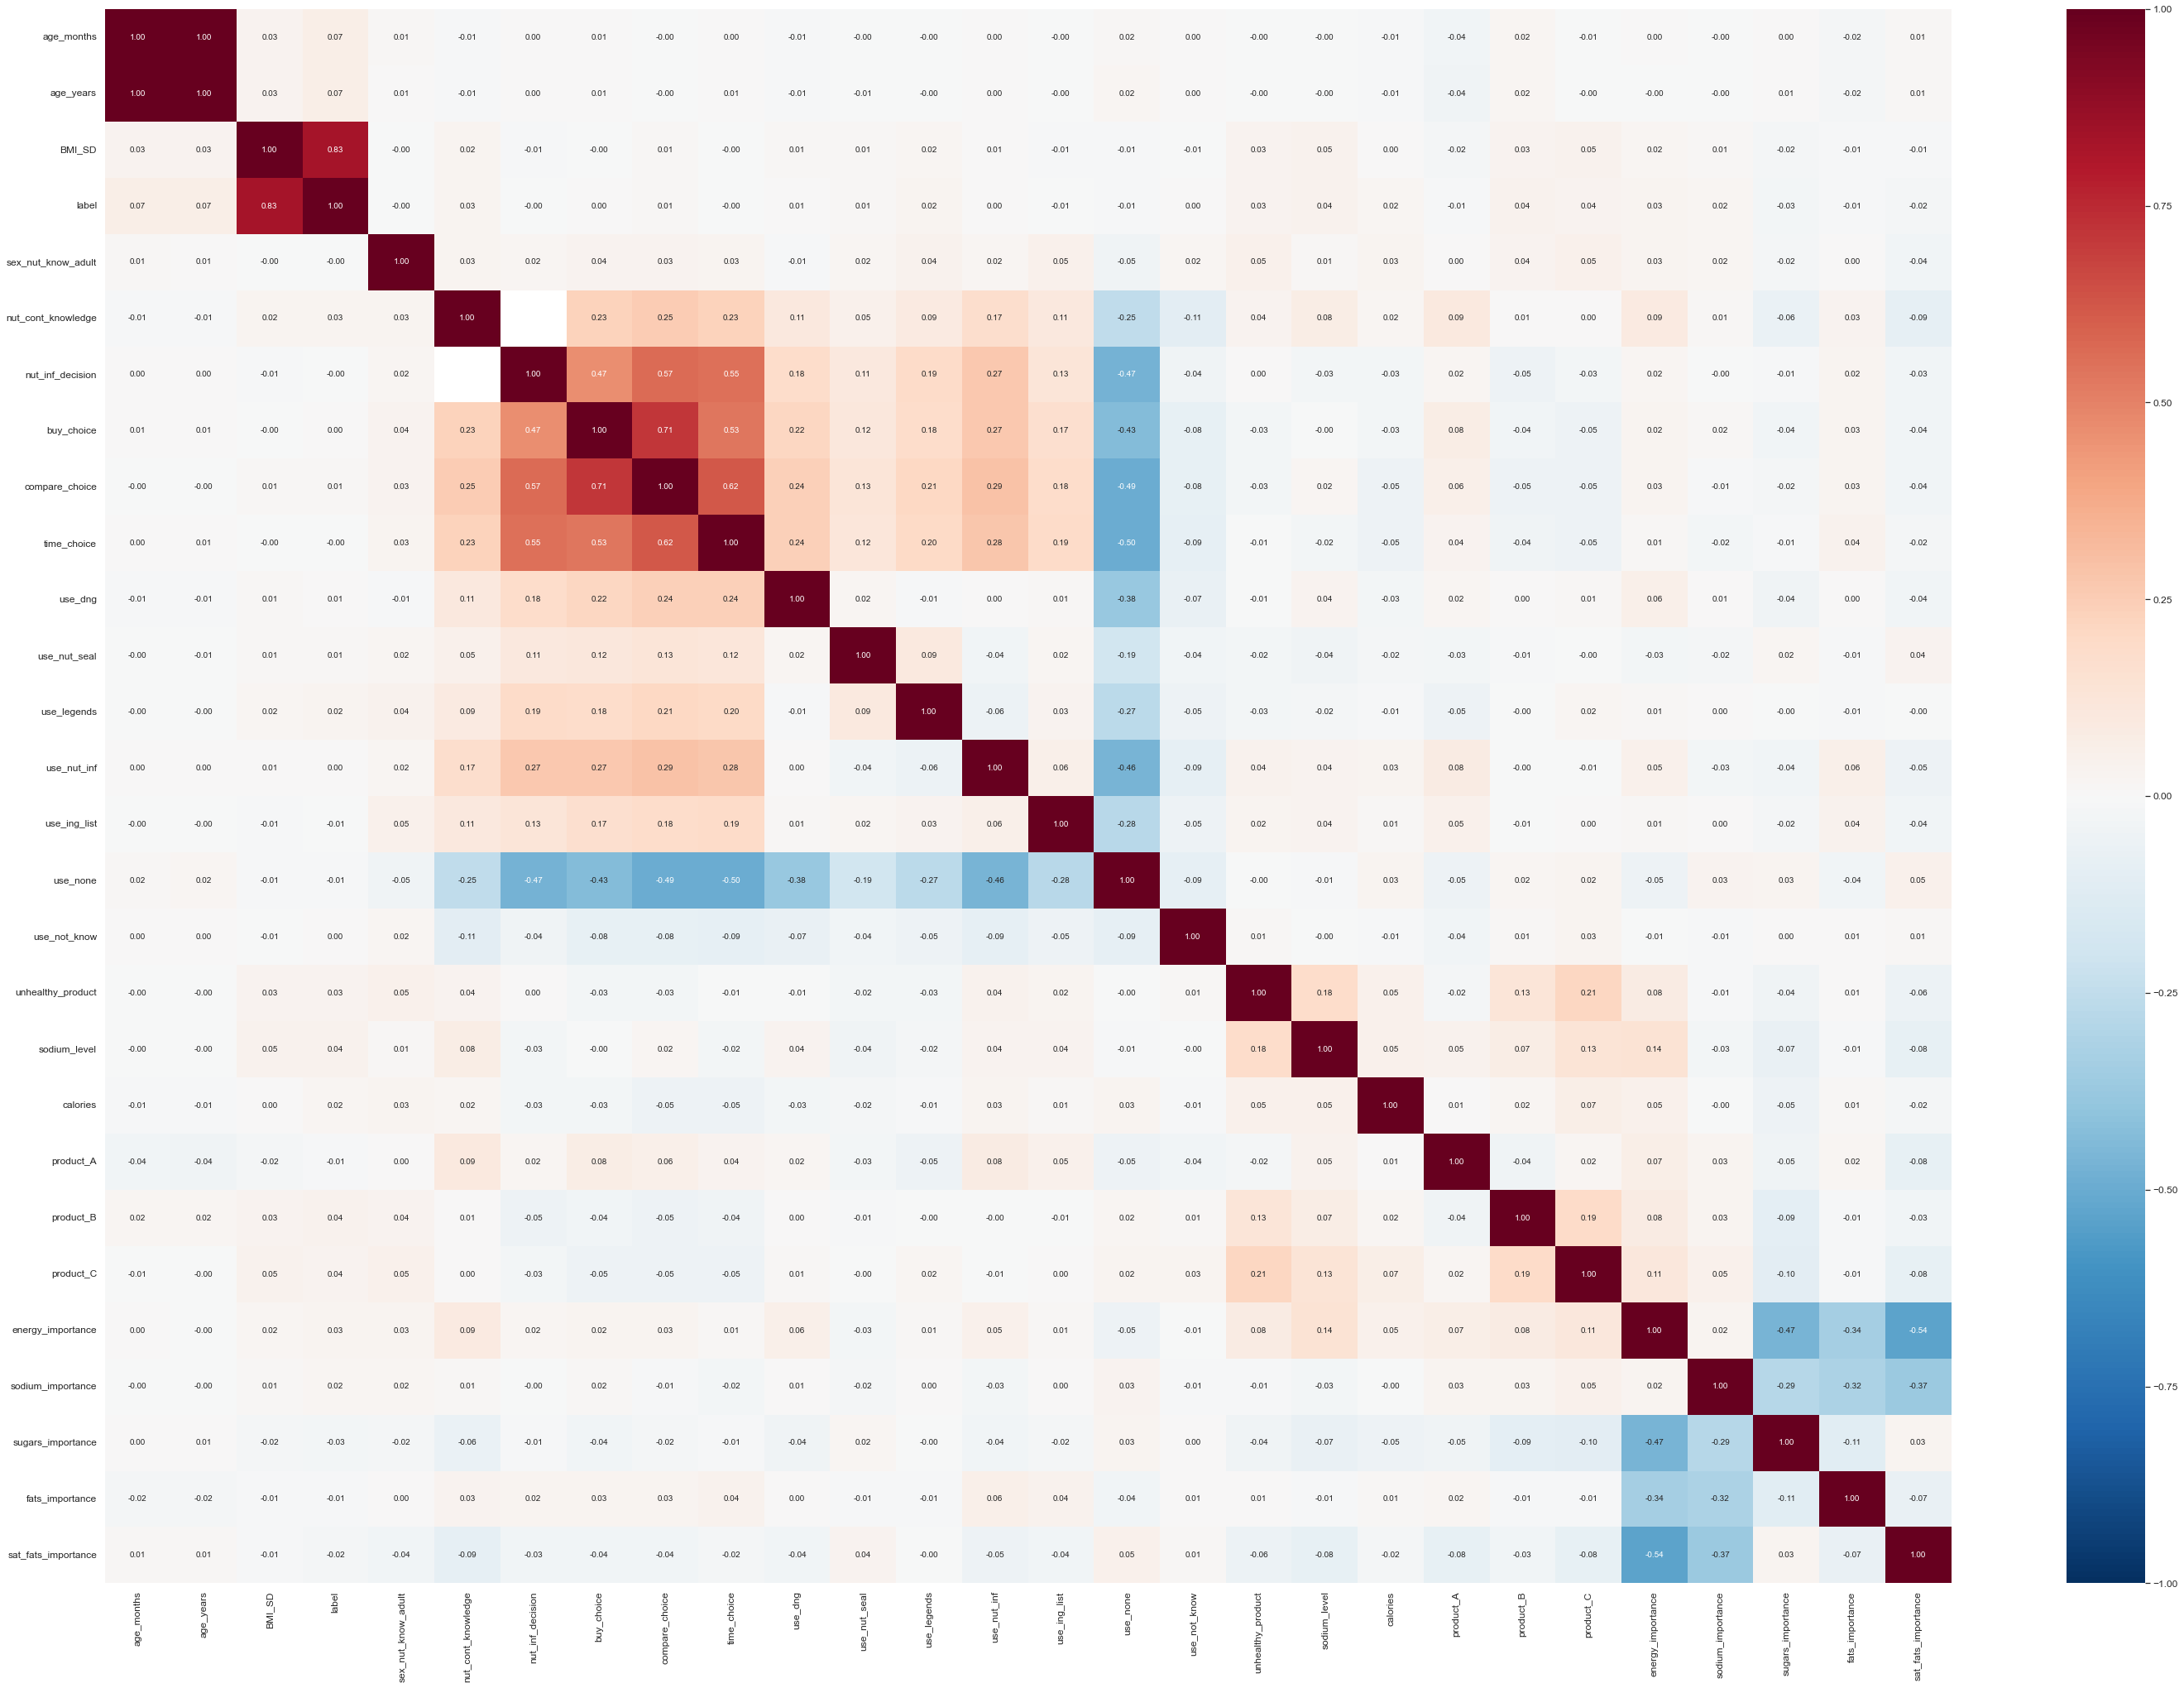

In [41]:
# Plot correlation matrix
fig, ax = plt.subplots(figsize=(50,35))
ax = heatmap(m5_dataset.corr(), fmt=".2f", annot=True, ax=ax, cmap="RdBu_r", vmin=-1, vmax=1)

Several questions seem to have some multi-colinnearity, and therefore, will be dropped. This is true because the questions are either if you use nutritional information to influence your buying choice or to compare the products. Because the priority is to know if that product reaches the home, buy_coice will be kept.

In [42]:
del m5_dataset["compare_choice"]

## Export CSV for unimodal supervised and unsupervised approaches

In [43]:
# Create copy
m5_unimodal = m5_dataset.copy()

# See info
m5_unimodal.columns.tolist()

['house_ID',
 'household_ID',
 'person_ID',
 'region',
 'strata',
 'locality_type',
 'locality_size',
 'age_months',
 'age_years',
 'sex',
 'BMI_SD',
 'label_cat',
 'label',
 'age_nut_know_adult',
 'sex_nut_know_adult',
 'nut_cont_knowledge',
 'nut_inf_decision',
 'buy_choice',
 'time_choice',
 'use_dng',
 'use_nut_seal',
 'use_legends',
 'use_nut_inf',
 'use_ing_list',
 'use_none',
 'use_not_know',
 'unhealthy_product',
 'sodium_level',
 'calories',
 'product_A',
 'product_B',
 'product_C',
 'energy_importance',
 'sodium_importance',
 'sugars_importance',
 'fats_importance',
 'sat_fats_importance',
 'kinship_nut_know_adult']

In [44]:
# Export unimodal CSV
m5_unimodal.to_csv(os.path.join(output_path,'m5_unimodal.csv'), index=None, header=True)

## Data preparation

### Merge based on sample dataset key
This was already done.

### Check for missing values

In [45]:
# Experiment 1: Drop all NaN
drop_all_nan = m5_dataset.dropna()
drop_all_nan.shape

(1694, 38)

In [46]:
# Experiment 2: Drop worked hours column and then remaining NaN
drop_columns_then_nan = m5_dataset.drop(columns=["product_A", "product_B", "product_C"])
drop_columns_then_nan = drop_columns_then_nan.dropna()
drop_columns_then_nan.shape

(4399, 35)

Since there the n when keeping the coulmns with more than 35% missing values results in less than the minimum acceptable n=2,344, the column will be dropped. 

Drop all columns with more than 35% of missing values. 

In [47]:
percentage = 35.0
min_percentage = int(((100-percentage)/100)*m5_dataset.shape[0] + 1)
m5_dataset = m5_dataset.dropna(axis=1,
                               thresh=min_percentage)
m5_dataset.shape

(8672, 35)

In [48]:
# Drop all rows with at least one NaN value.
m5_dataset = m5_dataset.dropna()
m5_dataset.shape

(4399, 35)

### Check label distribution

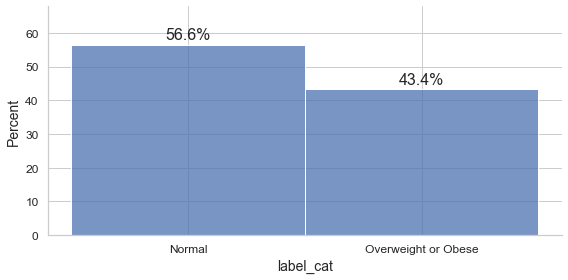

In [49]:
binary_SD_dist = sns.displot(data=m5_dataset, x="label_cat", 
                       height=4, aspect=2, stat="percent")

show_label_percent(binary_SD_dist)

plt.show()

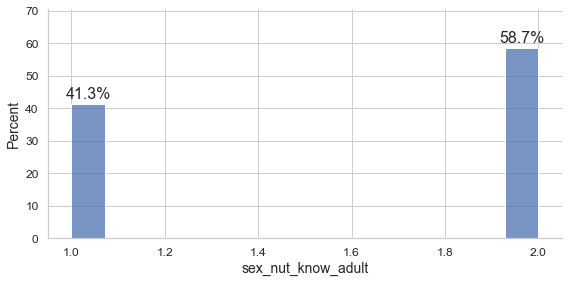

In [50]:
sex_nut_know_adu_dist = sns.displot(data=m5_dataset, x="sex_nut_know_adult", 
                       height=4, aspect=2, stat="percent")

show_label_percent(sex_nut_know_adu_dist)

plt.show()

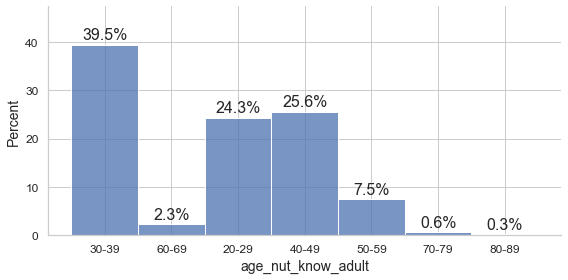

In [51]:
age_nut_know_adu_dist = sns.displot(data=m5_dataset, x="age_nut_know_adult", 
                       height=4, aspect=2, stat="percent")

show_label_percent(age_nut_know_adu_dist)

plt.show()

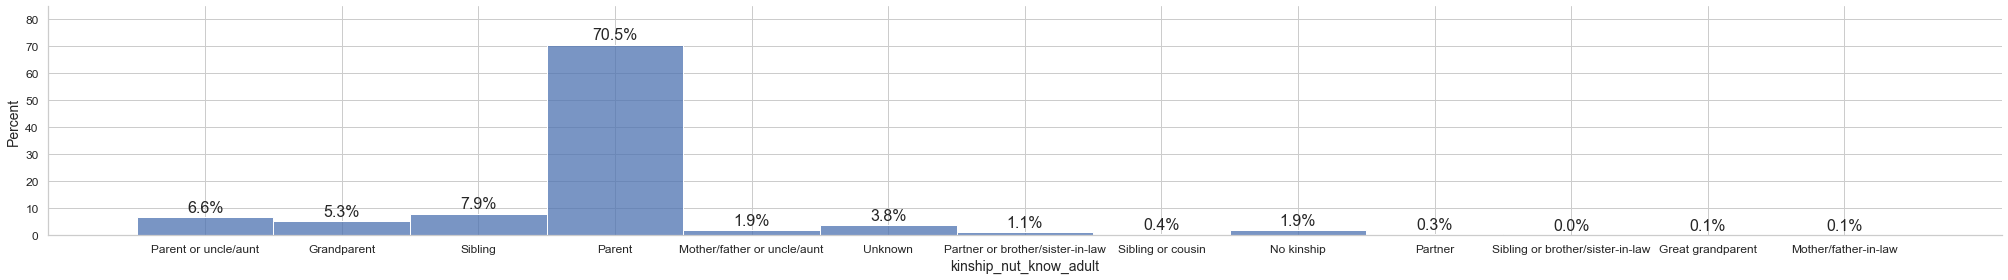

In [53]:
kinship_nut_know_adu_dist = sns.displot(data=m5_dataset, x="kinship_nut_know_adult", 
                       height=4, aspect=7, stat="percent")

show_label_percent(kinship_nut_know_adu_dist)

plt.show()

## Group setup for LOGO CV

### Create random groups for the Leave-One-Group-Out Cross-Validation

In [54]:
# Reset index
m5_dataset.reset_index(drop=True, inplace=True)

# Create fair random groups from 1 to 5 as a numpy array and convert it into DataFrame
random_groups = np.random.uniform(1,6,size=len(m5_dataset))
random_groups = pd.DataFrame(random_groups.astype(int))

# Assign group dataframe into column "group"
m5_dataset["group"] = random_groups
m5_dataset

,house_ID,household_ID,person_ID,region,strata,locality_type,locality_size,age_months,age_years,sex,...,unhealthy_product,sodium_level,calories,energy_importance,sodium_importance,sugars_importance,fats_importance,sat_fats_importance,kinship_nut_know_adult,group
0,1_4,1_4_1,1_4_1_8,Centre,3rd_strata,urban,">100,000",122,10,female,...,1.0,0.0,1.0,4.0,3.0,2.0,5.0,1.0,Parent or uncle/aunt,5
1,3_2,3_2_1,3_2_1_5,Centre,2nd_strata,urban,">100,000",149,12,female,...,1.0,0.0,1.0,1.0,3.0,5.0,4.0,2.0,Grandparent,4
2,4_3,4_3_1,4_3_1_5,Centre,2nd_strata,urban,">100,000",197,16,male,...,1.0,1.0,1.0,5.0,3.0,1.0,4.0,2.0,Sibling,3
3,6_4,6_4_1,6_4_1_3,Centre,2nd_strata,urban,">100,000",78,6,female,...,1.0,1.0,1.0,5.0,3.0,2.0,1.0,4.0,Parent,5
4,8_4,8_4_1,8_4_1_3,Centre,3rd_strata,urban,">100,000",136,11,female,...,1.0,1.0,1.0,5.0,4.0,1.0,3.0,2.0,Parent or uncle/aunt,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4394,3933_10,3933_10_1,3933_10_1_5,Centre,1st_strata,rural,"<2,500",90,7,male,...,1.0,1.0,1.0,1.0,5.0,2.0,3.0,4.0,Parent,4
4395,3935_15,3935_15_1,3935_15_1_3,Centre,2nd_strata,rural,"<2,500",206,17,male,...,1.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,Parent,3
4396,3936_14,3936_14_1,3936_14_1_3,Centre,2nd_strata,rural,"<2,500",208,17,female,...,0.0,0.0,1.0,1.0,2.0,5.0,3.0,4.0,Parent,3
4397,3937_18,3937_18_1,3937_18_1_4,Centre,2nd_strata,rural,"<2,500",75,6,female,...,1.0,1.0,1.0,1.0,3.0,2.0,4.0,5.0,Parent,5


In [55]:
# Verify size, NaN and Dtype of everything
m5_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4399 entries, 0 to 4398
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   house_ID                4399 non-null   object 
 1   household_ID            4399 non-null   object 
 2   person_ID               4399 non-null   object 
 3   region                  4399 non-null   object 
 4   strata                  4399 non-null   object 
 5   locality_type           4399 non-null   object 
 6   locality_size           4399 non-null   object 
 7   age_months              4399 non-null   int64  
 8   age_years               4399 non-null   int64  
 9   sex                     4399 non-null   object 
 10  BMI_SD                  4399 non-null   float64
 11  label_cat               4399 non-null   object 
 12  label                   4399 non-null   int64  
 13  age_nut_know_adult      4399 non-null   object 
 14  sex_nut_know_adult      4399 non-null   

### Check group representation

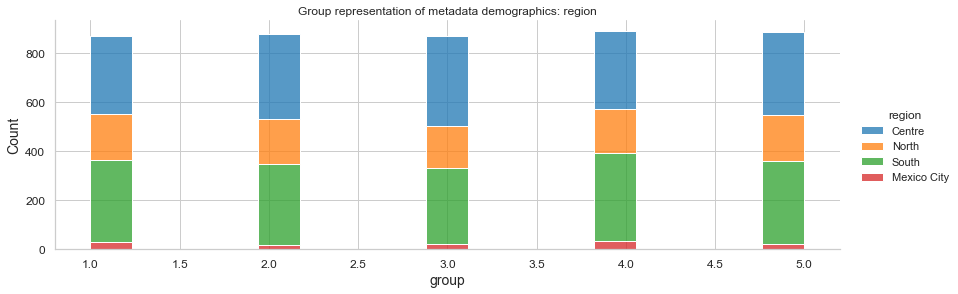

In [56]:
# Plot distributions to see representation of demographics in the groups
group_region = sns.displot(data=m5_dataset, x="group", hue="region", multiple="stack", palette="tab10",
                       height=4, aspect=3).set(title="""Group representation of metadata demographics: region""")
plt.show(group_region)

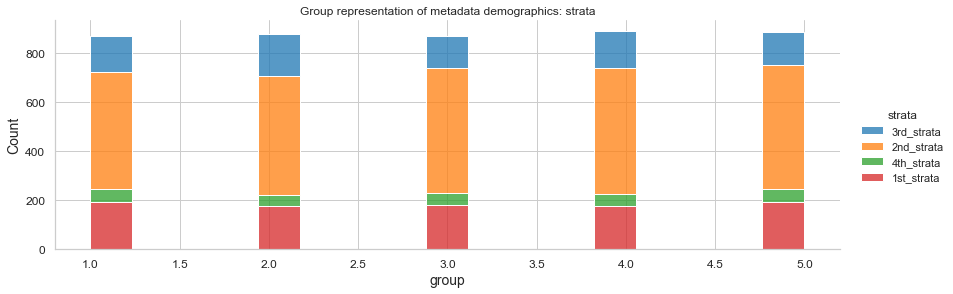

In [57]:
group_strata = sns.displot(data=m5_dataset, x="group", hue="strata", multiple="stack", palette="tab10",
                       height=4, aspect=3).set(title="""Group representation of metadata demographics: strata""")

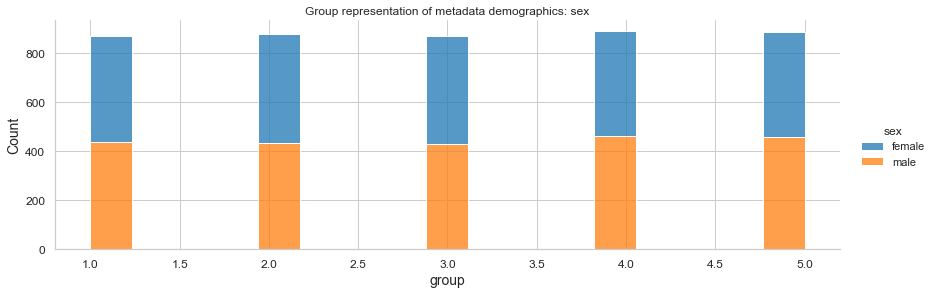

In [58]:
group_sex = sns.displot(data=m5_dataset, x="group", hue="sex", multiple="stack", palette="tab10",
                       height=4, aspect=3).set(title="""Group representation of metadata demographics: sex""")
plt.show(group_sex)

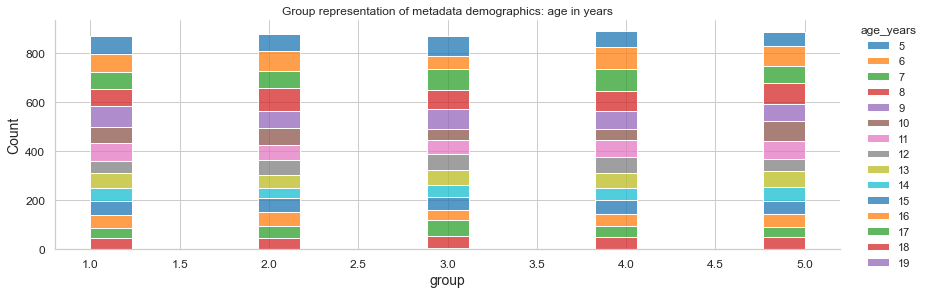

In [59]:
group_age_years = sns.displot(data=m5_dataset, x="group", hue="age_years", multiple="stack", palette="tab10",
                       height=4, aspect=3).set(title="""Group representation of metadata demographics: age in years""")

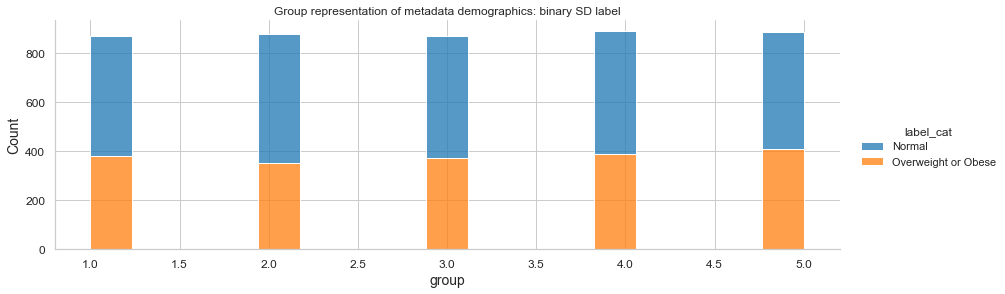

In [60]:
group_label_cat = sns.displot(data=m5_dataset, x="group", hue="label_cat", multiple="stack", palette="tab10",
                       height=4, aspect=3).set(title="""Group representation of metadata demographics: binary SD label""")
plt.show(group_label_cat)

### Remove metadata

In [61]:
# Remove unnecesary metadata keeping only the label_cat
m5_dataset = m5_dataset.drop(columns=["house_ID","household_ID","person_ID",
                                      "region","strata","locality_type","locality_size",
                                      "sex","age_months","age_years","BMI_SD","label_cat"])
m5_dataset.columns.tolist()

['label',
 'age_nut_know_adult',
 'sex_nut_know_adult',
 'nut_cont_knowledge',
 'nut_inf_decision',
 'buy_choice',
 'time_choice',
 'use_dng',
 'use_nut_seal',
 'use_legends',
 'use_nut_inf',
 'use_ing_list',
 'use_none',
 'use_not_know',
 'unhealthy_product',
 'sodium_level',
 'calories',
 'energy_importance',
 'sodium_importance',
 'sugars_importance',
 'fats_importance',
 'sat_fats_importance',
 'kinship_nut_know_adult',
 'group']

## Feature scaling
Since the data does not follow a Gausian distribution, the features will be standardized instead of normalized. 

### Create dummy variables of categorical features

In [62]:
# Identify categorical variables
m5_dataset.select_dtypes(include='object')

,age_nut_know_adult,kinship_nut_know_adult
0,30-39,Parent or uncle/aunt
1,60-69,Grandparent
2,20-29,Sibling
3,20-29,Parent
4,30-39,Parent or uncle/aunt
...,...,...
4394,30-39,Parent
4395,40-49,Parent
4396,50-59,Parent
4397,20-29,Parent


Categorical values:
- kinship
- buy_choice
- time_choice
- energy_importance
- sodium_importance
- sugars_importance
- fats_importance
- sat_fats_importance

To improve readibility of the dummy variables, the answers will be changed into categorical.

In [63]:
m5_dataset["buy_choice"] = m5_dataset["buy_choice"].replace([1.0,2.0,3.0,4.0,5.0],["never",
                                                                         "almost never",
                                                                         "sometimes",
                                                                         "almost always",
                                                                         "always"])

m5_dataset["time_choice"] = m5_dataset["time_choice"].replace([1.0,2.0,3.0,4.0],["Does not see it",
                                                                           "Less than 30 seconds",
                                                                           "From 30 to 60 seconds",
                                                                           "More than a minute"])

m5_dataset["energy_importance"] = m5_dataset["energy_importance"].replace([1.0,2.0,3.0,4.0,5.0],["Most important",
                                                                                       "Important",
                                                                                       "Neutral",
                                                                                       "Unimportant",
                                                                                       "Least important"])

m5_dataset["sodium_importance"] = m5_dataset["sodium_importance"].replace([1.0,2.0,3.0,4.0,5.0],["Most important",
                                                                                       "Important",
                                                                                       "Neutral",
                                                                                       "Unimportant",
                                                                                       "Least important"])

m5_dataset["sugars_importance"] = m5_dataset["sugars_importance"].replace([1.0,2.0,3.0,4.0,5.0],["Most important",
                                                                                       "Important",
                                                                                       "Neutral",
                                                                                       "Unimportant",
                                                                                       "Least important"])

m5_dataset["fats_importance"] = m5_dataset["fats_importance"].replace([1.0,2.0,3.0,4.0,5.0],["Most important",
                                                                                       "Important",
                                                                                       "Neutral",
                                                                                       "Unimportant",
                                                                                       "Least important"])

m5_dataset["sat_fats_importance"] = m5_dataset["sat_fats_importance"].replace([1.0,2.0,3.0,4.0,5.0],["Most important",
                                                                                       "Important",
                                                                                       "Neutral",
                                                                                       "Unimportant",
                                                                                       "Least important"])

m5_dataset["sex_nut_know_adult"] = m5_dataset["sex_nut_know_adult"].replace([1,2],["male","female"])

In [64]:
m5_dataset.select_dtypes(include='object')

,age_nut_know_adult,sex_nut_know_adult,buy_choice,time_choice,energy_importance,sodium_importance,sugars_importance,fats_importance,sat_fats_importance,kinship_nut_know_adult
0,30-39,female,sometimes,Less than 30 seconds,Unimportant,Neutral,Important,Least important,Most important,Parent or uncle/aunt
1,60-69,female,sometimes,Does not see it,Most important,Neutral,Least important,Unimportant,Important,Grandparent
2,20-29,male,never,Does not see it,Least important,Neutral,Most important,Unimportant,Important,Sibling
3,20-29,female,almost always,Less than 30 seconds,Least important,Neutral,Important,Most important,Unimportant,Parent
4,30-39,female,almost always,Less than 30 seconds,Least important,Unimportant,Most important,Neutral,Important,Parent or uncle/aunt
...,...,...,...,...,...,...,...,...,...,...
4394,30-39,female,sometimes,Does not see it,Most important,Least important,Important,Neutral,Unimportant,Parent
4395,40-49,female,almost always,Less than 30 seconds,Most important,Important,Neutral,Least important,Unimportant,Parent
4396,50-59,female,never,Does not see it,Most important,Important,Least important,Neutral,Unimportant,Parent
4397,20-29,female,never,Does not see it,Most important,Neutral,Important,Unimportant,Least important,Parent


### Create dummy variables

In [65]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Separate metadata
metadata_df = m5_dataset[["label","group"]]
X = m5_dataset.drop(columns=["label","group"])

# Set and fit the OneHotEncoder
oneHotEncoder = OneHotEncoder(sparse=False)
X_encoded = oneHotEncoder.fit_transform(X[["age_nut_know_adult","sex_nut_know_adult","buy_choice",
                                           "time_choice","energy_importance","sodium_importance","sugars_importance",
                                           "fats_importance","sat_fats_importance","kinship_nut_know_adult"]])

# Convert it back into a dataframe
encoded_df = pd.DataFrame(X_encoded, columns=oneHotEncoder.get_feature_names_out())

# Concatenate scaled dataframe and metadata
train_m5_encoded_df = pd.concat([X,encoded_df,metadata_df], axis=1)
train_m5_encoded_df

,age_nut_know_adult,sex_nut_know_adult,nut_cont_knowledge,nut_inf_decision,buy_choice,time_choice,use_dng,use_nut_seal,use_legends,use_nut_inf,...,kinship_nut_know_adult_Parent,kinship_nut_know_adult_Parent or uncle/aunt,kinship_nut_know_adult_Partner,kinship_nut_know_adult_Partner or brother/sister-in-law,kinship_nut_know_adult_Sibling,kinship_nut_know_adult_Sibling or brother/sister-in-law,kinship_nut_know_adult_Sibling or cousin,kinship_nut_know_adult_Unknown,label,group
0,30-39,female,1.0,1.0,sometimes,Less than 30 seconds,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5
1,60-69,female,1.0,1.0,sometimes,Does not see it,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4
2,20-29,male,1.0,1.0,never,Does not see it,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,3
3,20-29,female,1.0,0.0,almost always,Less than 30 seconds,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5
4,30-39,female,1.0,1.0,almost always,Less than 30 seconds,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4394,30-39,female,1.0,0.0,sometimes,Does not see it,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4
4395,40-49,female,1.0,1.0,almost always,Less than 30 seconds,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3
4396,50-59,female,1.0,0.0,never,Does not see it,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3
4397,20-29,female,1.0,1.0,never,Does not see it,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5


### Verify that everything is binary

In [66]:
train_m5_encoded_df.select_dtypes(include='object')

,age_nut_know_adult,sex_nut_know_adult,buy_choice,time_choice,energy_importance,sodium_importance,sugars_importance,fats_importance,sat_fats_importance,kinship_nut_know_adult
0,30-39,female,sometimes,Less than 30 seconds,Unimportant,Neutral,Important,Least important,Most important,Parent or uncle/aunt
1,60-69,female,sometimes,Does not see it,Most important,Neutral,Least important,Unimportant,Important,Grandparent
2,20-29,male,never,Does not see it,Least important,Neutral,Most important,Unimportant,Important,Sibling
3,20-29,female,almost always,Less than 30 seconds,Least important,Neutral,Important,Most important,Unimportant,Parent
4,30-39,female,almost always,Less than 30 seconds,Least important,Unimportant,Most important,Neutral,Important,Parent or uncle/aunt
...,...,...,...,...,...,...,...,...,...,...
4394,30-39,female,sometimes,Does not see it,Most important,Least important,Important,Neutral,Unimportant,Parent
4395,40-49,female,almost always,Less than 30 seconds,Most important,Important,Neutral,Least important,Unimportant,Parent
4396,50-59,female,never,Does not see it,Most important,Important,Least important,Neutral,Unimportant,Parent
4397,20-29,female,never,Does not see it,Most important,Neutral,Important,Unimportant,Least important,Parent


In [67]:
# Delete object columns
train_m5_encoded_df = train_m5_encoded_df.drop(columns=["age_nut_know_adult","sex_nut_know_adult","buy_choice",
                                           "time_choice","energy_importance","sodium_importance","sugars_importance",
                                           "fats_importance","sat_fats_importance","kinship_nut_know_adult"])

In [68]:
train_m5_encoded_df.select_dtypes(include='object')

""
0
1
2
3
4
...
4394
4395
4396
4397


In [69]:
train_m5_encoded_df.max(axis=0).head(60)

nut_cont_knowledge                                    1.0
nut_inf_decision                                      1.0
use_dng                                               1.0
use_nut_seal                                          1.0
use_legends                                           1.0
use_nut_inf                                           1.0
use_ing_list                                          1.0
use_none                                              1.0
use_not_know                                          1.0
unhealthy_product                                     1.0
sodium_level                                          1.0
calories                                              1.0
age_nut_know_adult_20-29                              1.0
age_nut_know_adult_30-39                              1.0
age_nut_know_adult_40-49                              1.0
age_nut_know_adult_50-59                              1.0
age_nut_know_adult_60-69                              1.0
age_nut_know_a

In [70]:
train_m5_encoded_df.max(axis=0).tail(60)

sodium_level                                               1.0
calories                                                   1.0
age_nut_know_adult_20-29                                   1.0
age_nut_know_adult_30-39                                   1.0
age_nut_know_adult_40-49                                   1.0
age_nut_know_adult_50-59                                   1.0
age_nut_know_adult_60-69                                   1.0
age_nut_know_adult_70-79                                   1.0
age_nut_know_adult_80-89                                   1.0
sex_nut_know_adult_female                                  1.0
sex_nut_know_adult_male                                    1.0
buy_choice_almost always                                   1.0
buy_choice_almost never                                    1.0
buy_choice_always                                          1.0
buy_choice_never                                           1.0
buy_choice_sometimes                                   

In [71]:
train_m5_encoded_df.shape

(4399, 70)

## Export datasets

In [72]:
# Export standardized dataset
train_m5_encoded_df.to_csv(os.path.join(output_path,'train_m5_encoded_df.csv'), index=None, header=True)